In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
df = pd.read_csv("/content/cinemaTicket_Ref.csv")
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [ ]:
df = df.drop('date', axis=1)

In [ ]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,5,2,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  month         142524 non-null  int64  
 11  quarter       142524 non-null  int64  
 12  day           142524 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 14.1 MB


In [ ]:
df.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142524.000000,142524.000000,1.425240e+05,142524.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142524.000000
mean,1518.985111,320.378427,1.234728e+07,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,6.776852,2.634721,16.112585
std,36.184450,159.701229,3.065486e+07,279.758733,2.923206,3.056276,22.653445,33236.599278,279.564935,953.118103,2.195843,0.809692,8.949471
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79454.235185,50.000000,525.714286,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.110000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


In [ ]:
df.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
month             0
quarter           0
day               0
dtype: int64

In [ ]:
median_capacity = df['capacity'].median()
df['capacity'].fillna(median_capacity, inplace=True)


In [ ]:
median_occu_perc = df['occu_perc'].median()
df['occu_perc'].fillna(median_occu_perc, inplace=True)


In [ ]:
df.isnull().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
month           0
quarter         0
day             0
dtype: int64

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
cinema_preprocessed = pd.DataFrame(data=X, columns=df.columns)
cinema_preprocessed.head(10)

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
0,-0.745768,-0.102557,-0.275562,-0.407987,-0.081217,0.022216,-0.693195,2.068973,-0.407421,-0.256213,-0.809192,-0.783907,-1.241707
1,-0.745768,0.198005,-0.293177,-0.350795,-0.081217,0.349413,-0.524506,-0.037146,-0.350189,-0.351230,-0.809192,-0.783907,-1.241707
2,-0.745768,1.055860,-0.319274,-0.386540,-0.081217,0.022216,0.001874,-0.037146,-0.385959,-0.728877,-0.809192,-0.783907,-1.241707
3,-0.745768,0.680157,-0.363639,-0.458030,-0.081217,-0.959374,-0.395119,0.564602,-0.457499,-0.782415,-0.809192,-0.783907,-1.241707
4,-0.745768,1.275020,-0.363639,-0.447307,-0.081217,-0.304981,-0.145176,-0.037146,-0.446768,-0.802368,-0.809192,-0.783907,-1.241707
5,-0.745768,-1.561537,-0.368533,-0.475903,-0.081217,-0.304981,-0.838038,2.068973,-0.475384,-0.147100,-0.809192,-0.783907,-1.241707
6,-0.745768,-0.985459,-0.369511,-0.465179,-0.081217,-0.304981,-0.541728,0.624777,-0.464653,-0.760324,-0.809192,-0.783907,-1.241707
7,-0.745768,0.811653,-0.378319,-0.483052,-0.081217,-0.304981,-0.811984,2.068973,-0.482538,-0.562546,-0.809192,-0.783907,-1.241707
8,-0.745768,-1.686771,-0.378319,-0.461605,-0.081217,-0.632178,-0.839363,-0.392725,-0.461076,0.318510,-0.809192,-0.783907,-1.241707
9,-0.745768,1.262497,-0.383212,-0.486627,-0.081217,-0.304981,-0.812867,2.068973,-0.486115,-0.625949,-0.809192,-0.783907,-1.241707


In [ ]:
missing_values = cinema_preprocessed.isnull().sum()
missing_values


film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
month           0
quarter         0
day             0
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cinema_preprocessed, target_variable, test_size=0.4, random_state=42)

NameError: name 'target_variable' is not defined

In [ ]:
pca = PCA(n_components=None)
dfx_pca = pca.fit(cinema_preprocessed)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
cinema_PCA = pca.fit_transform(cinema_preprocessed)
print(n_components)

3


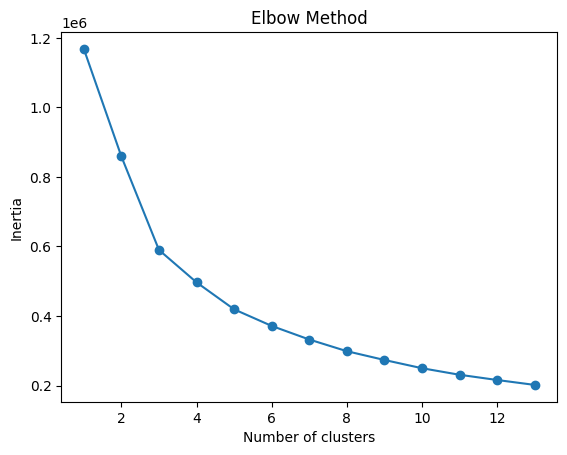

In [ ]:
inertia = []
for k in range(1, 14):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(cinema_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 14), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

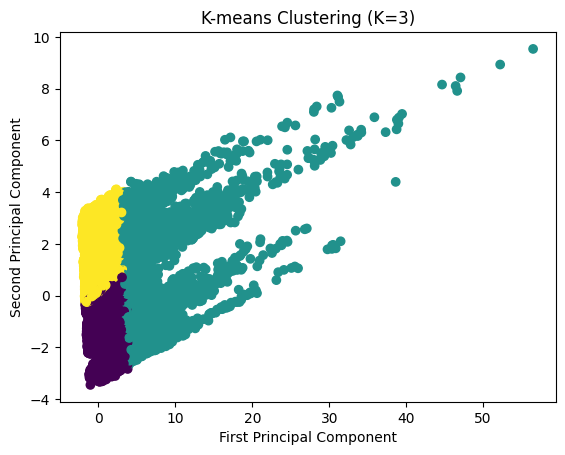

In [98]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(cinema_PCA)
plt.scatter(cinema_PCA[:, 0], cinema_PCA[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={n_clusters})")
plt.show()